   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Decision Tree Accuracy: 0.9853658536585366


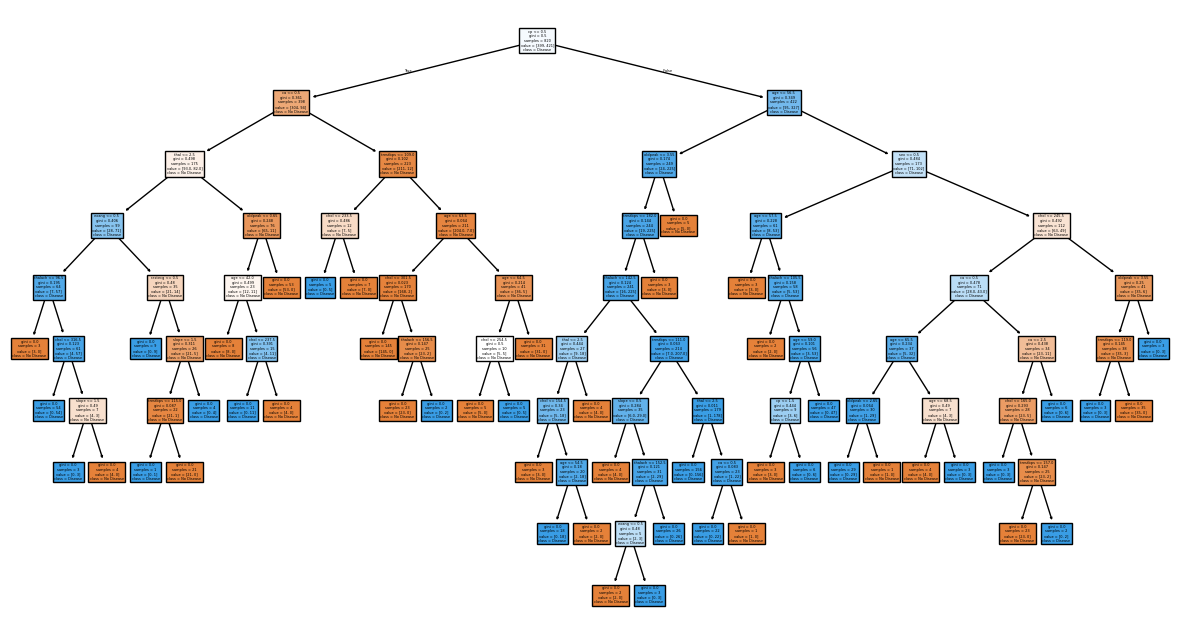

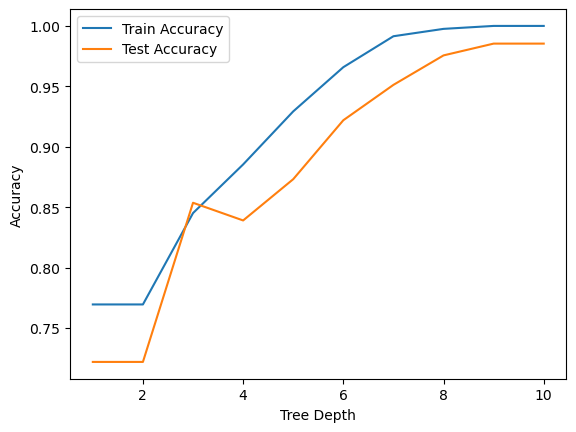

Random Forest Accuracy: 1.0


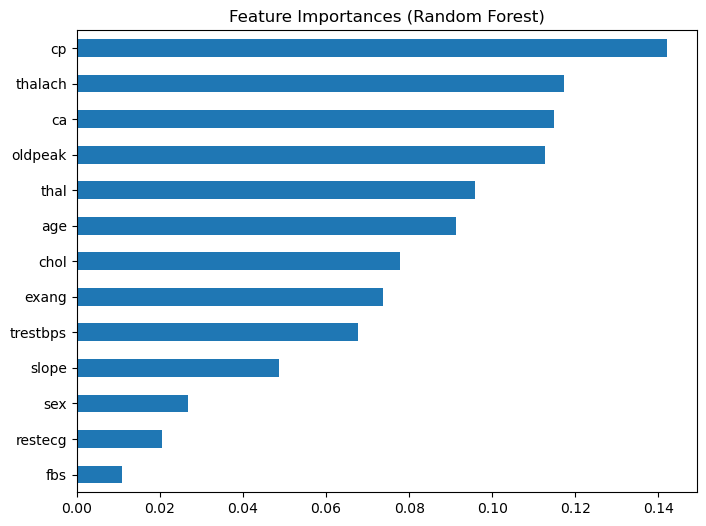

Decision Tree CV Accuracy (mean): 1.0
Random Forest CV Accuracy (mean): 0.9970731707317073


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
df = pd.read_csv("C:/Users/mr.venky/Downloads/heart.csv")
print(df.head())

# Features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

# 3. Analyze overfitting by controlling depth
train_acc, test_acc = [], []
for depth in range(1, 11):
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt_temp.predict(X_test)))

plt.plot(range(1, 11), train_acc, label="Train Accuracy")
plt.plot(range(1, 11), test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 5. Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importances (Random Forest)")
plt.show()

# 6. Cross-validation
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy (mean):", cv_scores_dt.mean())
print("Random Forest CV Accuracy (mean):", cv_scores_rf.mean())
